In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('personalized_medication_dataset.csv')
df

,Patient_ID,Age,Gender,Weight_kg,Height_cm,BMI,Chronic_Conditions,Drug_Allergies,Genetic_Disorders,Diagnosis,Symptoms,Recommended_Medication,Dosage,Duration,Treatment_Effectiveness,Adverse_Reactions,Recovery_Time_Days
0,P0001,78,Other,88.7,196.3,21.1,NaN,Penicillin,Cystic Fibrosis,Inflammation,Fever,Amlodipine,NaN,30 days,Effective,Yes,18
1,P0002,57,Female,90.5,195.6,30.2,Hypertension,NaN,Cystic Fibrosis,Depression,"Fatigue, Headache, Dizziness",Amoxicillin,5 mg,NaN,Neutral,No,24
2,P0003,29,Female,87.0,168.2,27.0,NaN,Sulfa,NaN,Inflammation,"Joint Pain, Headache, Nausea",NaN,NaN,7 days,Effective,Yes,12
3,P0004,56,Female,81.4,188.9,26.9,Hypertension,Penicillin,Cystic Fibrosis,Infection,Joint Pain,Ibuprofen,200 mg,7 days,Very Effective,No,22
4,P0005,90,Male,64.2,157.0,33.3,NaN,Sulfa,Sickle Cell Anemia,Inflammation,"Fatigue, Fever, Headache",Amlodipine,500 mg,10 days,Ineffective,Yes,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P0996,37,Male,99.1,159.2,26.8,Diabetes,NaN,NaN,Depression,Headache,Amlodipine,500 mg,10 days,Ineffective,No,28
996,P0997,28,Other,102.8,178.7,34.1,Asthma,NaN,Cystic Fibrosis,Depression,"Joint Pain, Headache, Dizziness",Amlodipine,500 mg,NaN,Effective,No,22
997,P0998,67,Male,58.1,198.1,20.4,Asthma,Penicillin,Cystic Fibrosis,Hypertension,"Cough, Dizziness",Ibuprofen,200 mg,7 days,Very Effective,Yes,13
998,P0999,79,Male,51.1,171.9,25.8,Hypertension,NaN,Cystic Fibrosis,Arthritis,"Fatigue, Fever",Ibuprofen,500 mg,10 days,Effective,No,26


In [2]:
#describing data using info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               1000 non-null   object 
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Weight_kg                1000 non-null   float64
 4   Height_cm                1000 non-null   float64
 5   BMI                      1000 non-null   float64
 6   Chronic_Conditions       754 non-null    object 
 7   Drug_Allergies           676 non-null    object 
 8   Genetic_Disorders        661 non-null    object 
 9   Diagnosis                1000 non-null   object 
 10  Symptoms                 1000 non-null   object 
 11  Recommended_Medication   737 non-null    object 
 12  Dosage                   805 non-null    object 
 13  Duration                 743 non-null    object 
 14  Treatment_Effectiveness  

In [3]:
#Data shape(checking number of columns and rows)
df.shape



(1000, 17)

In [4]:
#column names
print("Column Names:", df.columns.tolist())

Column Names: ['Patient_ID', 'Age', 'Gender', 'Weight_kg', 'Height_cm', 'BMI', 'Chronic_Conditions', 'Drug_Allergies', 'Genetic_Disorders', 'Diagnosis', 'Symptoms', 'Recommended_Medication', 'Dosage', 'Duration', 'Treatment_Effectiveness', 'Adverse_Reactions', 'Recovery_Time_Days']


In [5]:
#duplicated rows
df.duplicated().sum()

0

In [6]:
#missing values

df.isnull().sum()

Patient_ID                   0
Age                          0
Gender                       0
Weight_kg                    0
Height_cm                    0
BMI                          0
Chronic_Conditions         246
Drug_Allergies             324
Genetic_Disorders          339
Diagnosis                    0
Symptoms                     0
Recommended_Medication     263
Dosage                     195
Duration                   257
Treatment_Effectiveness      0
Adverse_Reactions            0
Recovery_Time_Days           0
dtype: int64

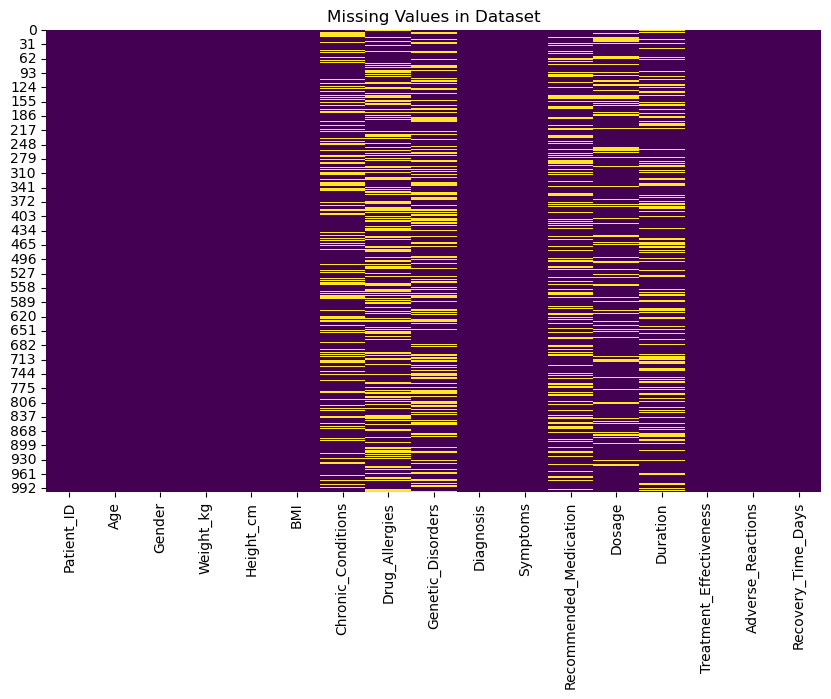

In [7]:

# Visualizing missing values using a heatmap(BEFORE FILLING MISSING DATA)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values in Dataset")
plt.show()

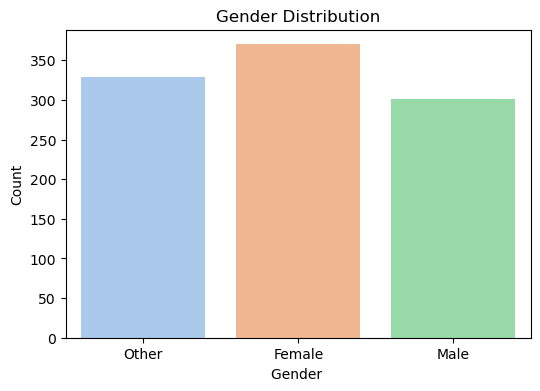

In [8]:
# Count plot for Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot( x=df['Gender'], 
    hue=df['Gender'],  # Assign the x variable to hue
    palette="pastel",  # Use the pastel color palette
    legend=False)
plt.title("Gender Distribution")
plt.xlabel("Gender ")#(0 = Male, 1 = Female)")
plt.ylabel("Count")
plt.show()


In [9]:
print(df.groupby("Gender")["Recommended_Medication"].value_counts())


Gender  Recommended_Medication
Female  Amoxicillin               100
        Amlodipine                 92
        Ibuprofen                  87
Male    Amlodipine                 82
        Ibuprofen                  75
        Amoxicillin                70
Other   Amoxicillin                84
        Ibuprofen                  76
        Amlodipine                 71
Name: count, dtype: int64


In [10]:
#from scipy.spatial.distance import cdist

# Calculate the mean values of all numeric features for each gender group
male_features = df[df['Gender'] == "Male"].select_dtypes(include=[np.number]).mean()
female_features = df[df['Gender'] == "Female"].select_dtypes(include=[np.number]).mean()
other_features = df[df['Gender'] == "Other"].select_dtypes(include=[np.number]).mean()
# Compute Euclidean distances between the "Other" group and the "Male" and "Female" groups
distances = {
    'Male': np.linalg.norm(other_features - male_features),
    'Female': np.linalg.norm(other_features - female_features)
}
closest_gender = min(distances, key=distances.get)  # Choose the closest match
print(f"Most similar group for 'Other' is: {closest_gender}")


Most similar group for 'Other' is: Female


The code:

Computes the mean feature vectors for the "Male", "Female", and "Other" gender groups.

Calculates the Euclidean distance between the "Other" group's mean feature vector and the mean feature vectors of the "Male" and "Female" groups.

Determines which gender group ("Male" or "Female") is closest to the "Other" group.

Prints the result.

In [11]:
import numpy as np
import pandas as pd



# Step 1: Replace "Other" with "Female"
df['Gender'] = df['Gender'].apply(lambda x: 'Female' if x == 'Other' else x)

# Step 2: Convert "Male" and "Female" to numerical values (0 and 1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [12]:
df['Gender']

0      1
1      1
2      1
3      1
4      0
      ..
995    0
996    1
997    0
998    0
999    1
Name: Gender, Length: 1000, dtype: int64

In [13]:
# Find the most common medication (mode)
most_common_medication = df['Recommended_Medication'].mode()[0]

# Fill missing values with the most common medication (using the recommended approach)
df['Recommended_Medication'] = df['Recommended_Medication'].fillna(most_common_medication)

# Verify that there are no more missing values
print("Missing values after filling:\n", df['Recommended_Medication'].isna().sum())

Missing values after filling:
 0


In [14]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Weight_kg', 'Height_cm', 'BMI',
       'Chronic_Conditions', 'Drug_Allergies', 'Genetic_Disorders',
       'Diagnosis', 'Symptoms', 'Recommended_Medication', 'Dosage', 'Duration',
       'Treatment_Effectiveness', 'Adverse_Reactions', 'Recovery_Time_Days'],
      dtype='object')

In [15]:
import pandas as pd
import numpy as np
import re

# Function to extract numeric value from a dosage string (e.g., "5 mg" -> 5)
def clean_dosage(val):
    if pd.isna(val):
        return np.nan
    try:
        # Try converting directly (if already numeric)
        return float(val)
    except:
        # Use regex to extract numeric portion 
        m = re.search(r'\d+(\.\d+)?', str(val))
        if m:
            return float(m.group())
        else:
            return np.nan

# Apply the cleaning function and store the results in a new column
df['Dosage_clean'] = df['Dosage'].apply(clean_dosage)

print("Missing dosage values after cleaning:", df['Dosage_clean'].isnull().sum())


Missing dosage values after cleaning: 195


In [16]:
#  Replace missing Dosage values with the median of the cleaned dosage values
median_value = df['Dosage_clean'].median()
df['Dosage_median'] = df['Dosage_clean'].fillna(median_value)

print("Missing dosage values after median imputation:", df['Dosage_median'].isnull().sum())


Missing dosage values after median imputation: 0


In [17]:
# Function to convert "X days" to hours
def convert_to_hours(duration):
    if pd.isna(duration) or duration == 'None':
        return np.nan
    if 'days' in duration:
        days = int(duration.split()[0])  # Extract the number of days
        return int(days * 24)  # Convert days to hours
    return np.nan  # Handle other cases if needed

# Apply the function to the Duration column
df['Duration'] = df['Duration'].apply(convert_to_hours)

In [18]:
df.columns
            

Index(['Patient_ID', 'Age', 'Gender', 'Weight_kg', 'Height_cm', 'BMI',
       'Chronic_Conditions', 'Drug_Allergies', 'Genetic_Disorders',
       'Diagnosis', 'Symptoms', 'Recommended_Medication', 'Dosage', 'Duration',
       'Treatment_Effectiveness', 'Adverse_Reactions', 'Recovery_Time_Days',
       'Dosage_clean', 'Dosage_median'],
      dtype='object')

In [19]:
df['Duration'].isna().sum()

257

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error

#1. Rename column: Convert 'Duration' to 'Duration(hrs)'
df = df.rename(columns={'Duration': 'Duration(hrs)'})

# 2.Check missing values before prediction
print("Missing values before prediction:\n", df.isnull().sum())

# 3.Select features likely related to Duration(hrs)
features = ['Age', 'Gender', 'BMI', 'Recovery_Time_Days']

# 4.Separate rows with known Duration(hrs) and those with missing values
df_train = df.dropna(subset=['Duration(hrs)']).copy()  # Known values
df_test = df[df['Duration(hrs)'].isna()].copy()         # Missing values

# 5. If there are missing values, perform imputation using GradientBoostingRegressor
if not df_test.empty:
    # Prepare training data for imputation
    X_train = df_train[features]
    y_train = df_train['Duration(hrs)']
    X_test = df_test[features]
    
    #6. Split training data for validation
    X_train_split, X_valid, y_train_split, y_valid = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )
    
    # 7.Scale features for better regression performance
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_split)
    X_valid_scaled = scaler.transform(X_valid)
    # Only transform X_test if it's not empty
    X_test_scaled = scaler.transform(X_test) if not X_test.empty else None
    
    # 8.Set up GradientBoostingRegressor with hyperparameter tuning
    gbr = GradientBoostingRegressor(random_state=42)
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.1, 0.05],
        'max_depth': [3, 5]
    }
    grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train_split)
    
      # 9. Evaluate the best model on the validation set
    best_model = grid_search.best_estimator_
    y_pred_valid = best_model.predict(X_valid_scaled)
    mae = mean_absolute_error(y_valid, y_pred_valid)
    print(f"Validation MAE using GradientBoostingRegressor: {mae:.2f}")
    
    #10. Use best_model to predict missing Duration(hrs) values
    if X_test_scaled is not None:
        imputed_values = best_model.predict(X_test_scaled)
        df.loc[df['Duration(hrs)'].isna(), 'Duration(hrs)'] = imputed_values
else:
    print("No missing values in 'Duration(hrs)' to predict.")

# 11.Convert Duration(hrs) to integer
df['Duration(hrs)'] = df['Duration(hrs)'].astype(int)

# 12.Check missing values after prediction
print("Missing values after prediction:\n", df.isnull().sum())


Missing values before prediction:
 Patient_ID                   0
Age                          0
Gender                       0
Weight_kg                    0
Height_cm                    0
BMI                          0
Chronic_Conditions         246
Drug_Allergies             324
Genetic_Disorders          339
Diagnosis                    0
Symptoms                     0
Recommended_Medication       0
Dosage                     195
Duration(hrs)              257
Treatment_Effectiveness      0
Adverse_Reactions            0
Recovery_Time_Days           0
Dosage_clean               195
Dosage_median                0
dtype: int64
Validation MAE using GradientBoostingRegressor: 230.82
Missing values after prediction:
 Patient_ID                   0
Age                          0
Gender                       0
Weight_kg                    0
Height_cm                    0
BMI                          0
Chronic_Conditions         246
Drug_Allergies             324
Genetic_Disorders         

Duration(hrs) Imputation with GradientBoostingRegressor

1.Column Renaming & Missing Value Check:

      .The code renames the 'Duration' column to 'Duration(hrs)' and              prints the number of missing values for each column.

2.Data Splitting for Imputation:

     .It separates the rows with known duration values (for training) from       those with missing duration values (for imputation).

3.Feature Scaling:

    .The numeric features related to duration (Age, Gender, BMI,                Recovery_Time_Days) are scaled using StandardScaler to improve             regression performance.

4.GradientBoostingRegressor Tuning:

    .A grid search is performed on a GradientBoostingRegressor to find the     best hyperparameters (number of estimators, learning rate, max depth)      using negative mean absolute error as the scoring metric.
    
    .The model is validated on a hold-out set, and the Mean Absolute Error    (MAE) is printed.

5.Imputation:

    .The best model is then used to predict and fill in missing duration       values.

6.Post-processing:

    .The imputed duration values are converted to integers.

    .Finally, the code prints the missing values after prediction to           confirm all missing values are filled.

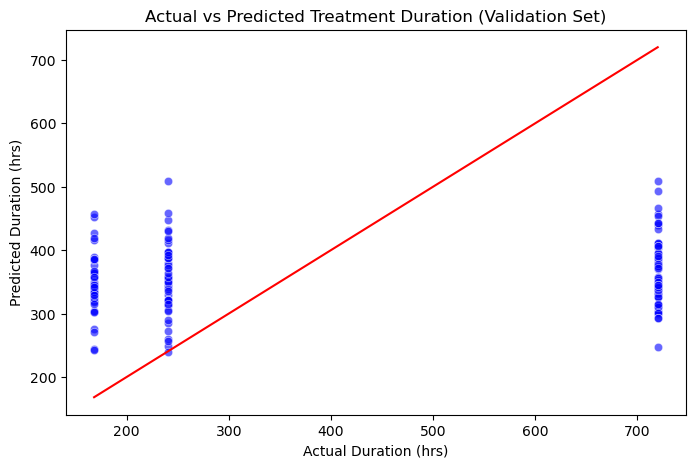

In [21]:
# Visualizing the predicted vs actual values in the validation set
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_valid, y=y_pred_valid, alpha=0.6, color="blue")
sns.lineplot(x=[y_valid.min(), y_valid.max()], y=[y_valid.min(), y_valid.max()], color="red")  # Perfect line
plt.title("Actual vs Predicted Treatment Duration (Validation Set)")
plt.xlabel("Actual Duration (hrs)")
plt.ylabel("Predicted Duration (hrs)")
plt.show()




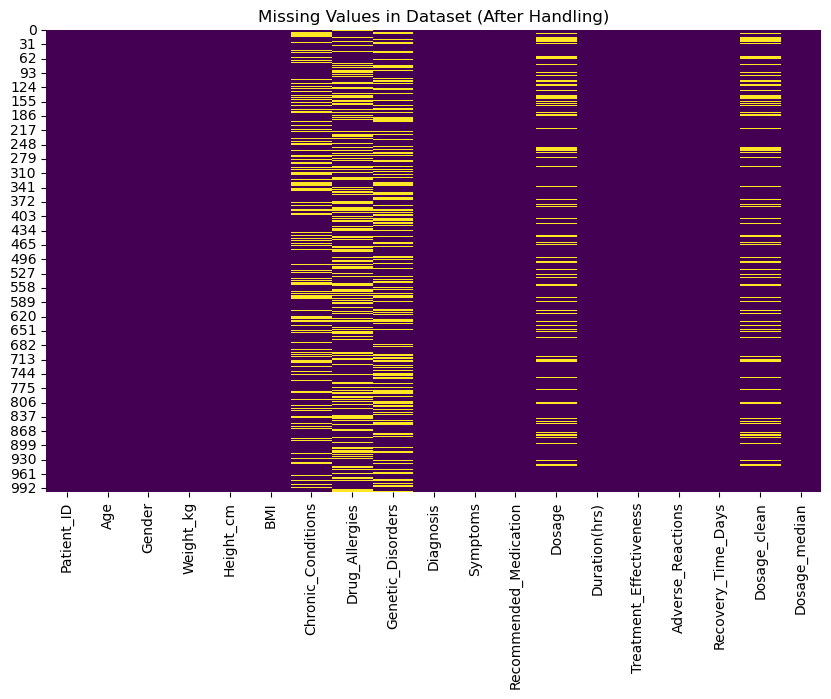

In [22]:
# Visualizing missing values again (AFTER handling missing data)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values in Dataset (After Handling)")
plt.show()

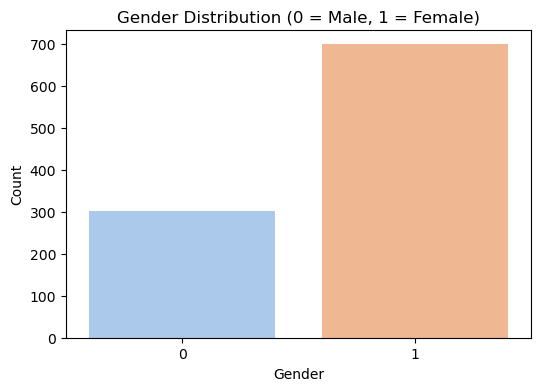

In [23]:
# Gender distribution after changes
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Gender'],
               hue=df['Gender'],  # Assign the x variable to hue
               palette="pastel",  # Use the pastel color palette
               legend=False)
plt.title("Gender Distribution (0 = Male, 1 = Female)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()



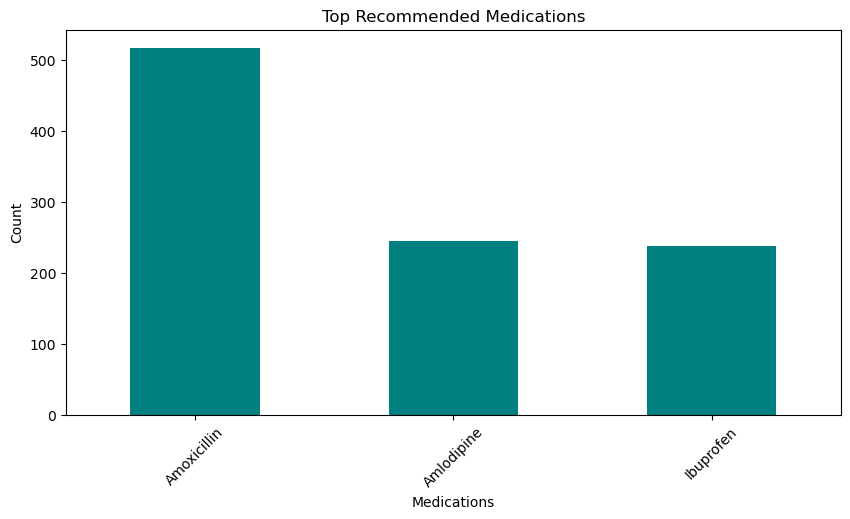

In [24]:
# Top prescribed medications
top_medications = df['Recommended_Medication'].value_counts()
top_medications_count = min(10, len(top_medications))  # Ensure at most 10 medications
plt.figure(figsize=(10, 5))
top_medications.nlargest(top_medications_count).plot(kind='bar', color='teal')
plt.title("Top Recommended Medications")
plt.xlabel("Medications")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

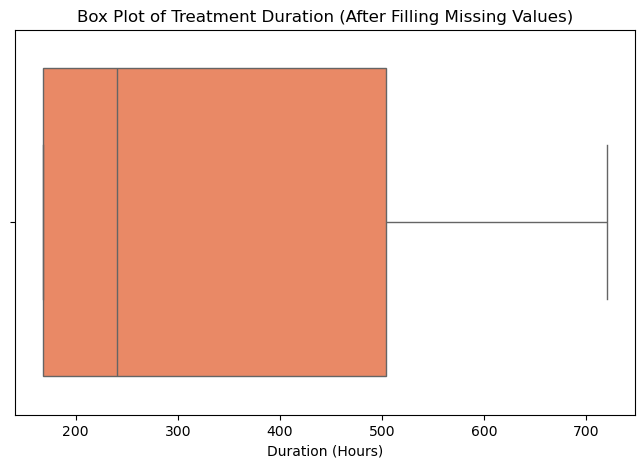

In [25]:

# Box plot for Treatment Duration (AFTER filling missing values)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Duration(hrs)'], color="coral")
plt.title("Box Plot of Treatment Duration (After Filling Missing Values)")
plt.xlabel("Duration (Hours)")
plt.show()


Why?

This heatmap helps visualize where missing values are present in the dataset, allowing us to decide if more data cleaning is required.

plt.figure(figsize=(10, 6))

Purpose: Sets the size of the plot to 10 inches (width) × 6 inches (height).

Why: Makes the visualization larger and easier to read.

sns.heatmap(...)

Purpose: Generates a heatmap to visualize missing values in the dataset.

Details:

df.isnull():

Creates a boolean DataFrame where True indicates a missing value (NaN or None) and False indicates a valid value.

cmap='viridis':

Uses the "viridis" color palette (yellow for True/missing, purple for False/not missing).

cbar=False:

Hides the color bar legend, as the plot is binary (missing vs. not missing).

plt.title("Missing Values in Dataset")

Purpose: Adds a title to the plot for clarity.

plt.show()

Purpose: Displays the final visualization.

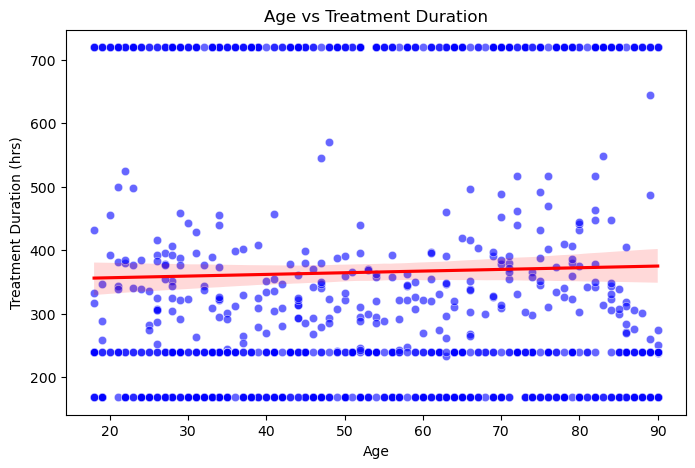

In [26]:
# Scatter plot of Age vs Treatment Duration with trend line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Age'], y=df['Duration(hrs)'], alpha=0.6, color="blue")
sns.regplot(x=df['Age'], y=df['Duration(hrs)'], scatter=False, line_kws={"color": "red"})  # Trend line
plt.title("Age vs Treatment Duration")
plt.xlabel("Age")
plt.ylabel("Treatment Duration (hrs)")
plt.show()

In [27]:
df.isna().sum()

Patient_ID                   0
Age                          0
Gender                       0
Weight_kg                    0
Height_cm                    0
BMI                          0
Chronic_Conditions         246
Drug_Allergies             324
Genetic_Disorders          339
Diagnosis                    0
Symptoms                     0
Recommended_Medication       0
Dosage                     195
Duration(hrs)                0
Treatment_Effectiveness      0
Adverse_Reactions            0
Recovery_Time_Days           0
Dosage_clean               195
Dosage_median                0
dtype: int64

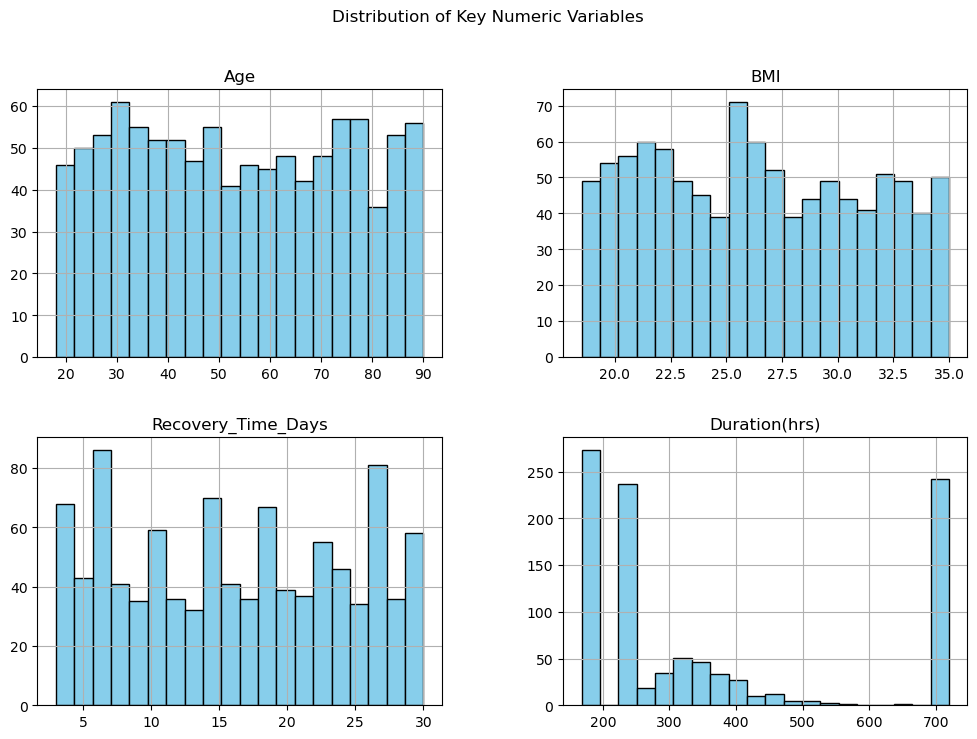

In [28]:
# Histograms for Numeric Variables
#To check for skewness and outliers:
numeric_cols = ['Age', 'BMI', 'Recovery_Time_Days', 'Duration(hrs)']
df[numeric_cols].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Key Numeric Variables")
plt.show()


The visualizations provide key insights into the dataset:

1️⃣ Age, BMI, and Recovery Time Distributions

The age distribution appears well-spread.
BMI distribution shows a concentration around healthy/mid-range values.
Recovery time varies, with a noticeable range of durations.


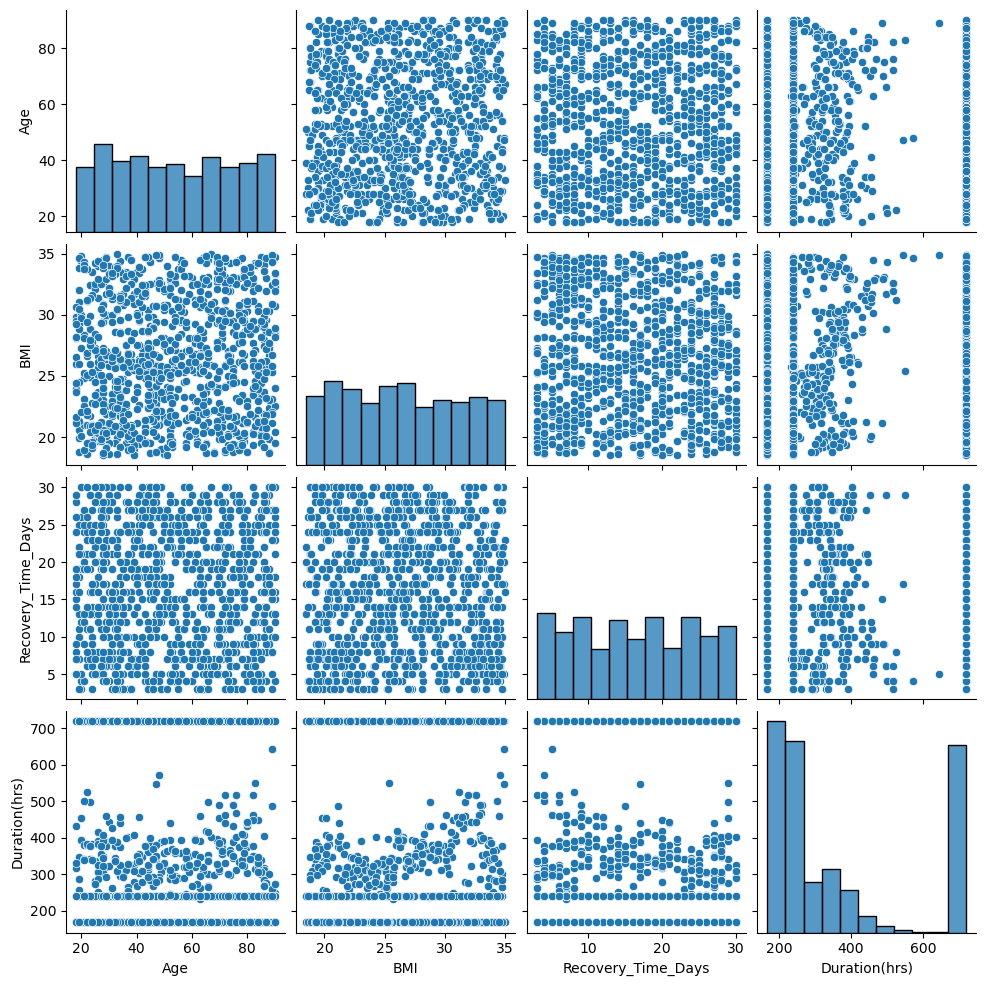

In [29]:
# Pairplot
#To visually examine relationships:
sns.pairplot(df[['Age', 'BMI', 'Recovery_Time_Days', 'Duration(hrs)']])
plt.show()



In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate IQR for "Duration(hrs)"
Q1 = df["Duration(hrs)"].quantile(0.25)
Q3 = df["Duration(hrs)"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for winsorization
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply winsorization: cap extreme values to the calculated bounds
df["Duration(hrs)"] = df["Duration(hrs)"].clip(lower=lower_bound, upper=upper_bound)



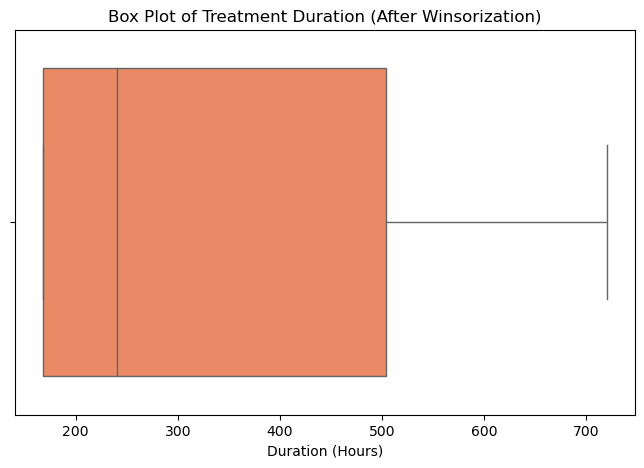

Remaining outlier count: 0


In [31]:
# Plot the box plot to confirm outlier handling
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Duration(hrs)"], color="coral")
plt.title("Box Plot of Treatment Duration (After Winsorization)")
plt.xlabel("Duration (Hours)")
plt.show()

# Check the number of remaining outliers (should be 0 after capping)
remaining_outliers = df[(df["Duration(hrs)"] < lower_bound) | (df["Duration(hrs)"] > upper_bound)]
print("Remaining outlier count:", remaining_outliers.shape[0])

Interpretation of the Box Plot & Outlier Status

-The box plot  generated represents the distribution of treatment duration (in hours) after applying winsorization, which caps extreme values to stay within the interquartile range (IQR-based limits).
-The absence of individual points outside the whiskers of the box plot suggests that there are no remaining outliers in the Duration(hrs) column after applying winsorization.
-The printed statement "Remaining outlier count: 0" confirms that all previously detected outliers have been adjusted to fit within the acceptable range.

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming df is your preprocessed DataFrame

# Create combined text feature if not already present
if 'combined_text' not in df.columns:
    df["combined_text"] = df["Diagnosis"].fillna('') + " " + df["Symptoms"].fillna('')

# Encode the target variable
le_med = LabelEncoder()
df['Medication_Label'] = le_med.fit_transform(df['Recommended_Medication'])

# Define feature sets
numeric_features = ['Age', 'Gender', 'BMI', 'Recovery_Time_Days', 'Duration(hrs)']
text_feature = 'combined_text'
X = df[numeric_features + [text_feature]]
y = df['Medication_Label']

# Split data
X_train_sup, X_test_sup, y_train_sup, y_test_sup = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Build the preprocessing pipeline with an extended grid for the text component
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('text', Pipeline([
            ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1,2))),
            ('svd', TruncatedSVD(random_state=42))
        ]), text_feature)
    ]
)

# Create the pipeline with RandomForestClassifier
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Extended hyperparameter grid (we vary TF-IDF max_features and SVD n_components as well)
param_grid = {
    'preprocessor__text__tfidf__max_features': [3000, 5000],
    'preprocessor__text__svd__n_components': [20, 50],
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(pipeline_rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_sup, y_train_sup)

print("Best parameters for supervised model:")
print(grid_search.best_params_)

y_pred_sup = grid_search.best_estimator_.predict(X_test_sup)
sup_accuracy = accuracy_score(y_test_sup, y_pred_sup)
print(f"Improved Supervised Model Accuracy: {sup_accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_sup, y_pred_sup, target_names=[str(x) for x in le_med.classes_]))

# Update the supervised recommendation function to use the new best estimator
def get_supervised_recommendation(patient_index):
    patient_data = df.iloc[[patient_index]][numeric_features + [text_feature]]
    pred_label = grid_search.best_estimator_.predict(patient_data)[0]
    return le_med.inverse_transform([pred_label])[0]


Best parameters for supervised model:
{'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200, 'preprocessor__text__svd__n_components': 20, 'preprocessor__text__tfidf__max_features': 3000}
Improved Supervised Model Accuracy: 0.51

Classification Report:
              precision    recall  f1-score   support

  Amlodipine       0.33      0.08      0.13        49
 Amoxicillin       0.53      0.89      0.66       103
   Ibuprofen       0.43      0.12      0.19        48

    accuracy                           0.51       200
   macro avg       0.43      0.37      0.33       200
weighted avg       0.46      0.51      0.42       200



In [33]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Collaborative Filtering Model


# For collaborative filtering,  use demographic/clinical numeric features:
# chosen: Age, BMI, Recovery_Time_Days, and Duration(hrs)
cf_features = ['Age', 'BMI', 'Recovery_Time_Days', 'Duration(hrs)']
cf_data = df[cf_features].copy()

# Initialize NearestNeighbors model
nn_model = NearestNeighbors(n_neighbors=6, metric='euclidean')  # 6 includes the query patient itself
nn_model.fit(cf_data)

def get_cf_recommendations(patient_index, top_n=5):
  
    distances, indices = nn_model.kneighbors(cf_data.iloc[patient_index:patient_index+1])
    # Exclude the patient itself (first neighbor) and select top_n neighbors
    neighbor_indices = indices.flatten()[1:top_n+1]
    # Retrieve recommended medications of similar patients
    cf_rec = df.iloc[neighbor_indices][["Patient_ID", "Recommended_Medication"]]
    return cf_rec



In [34]:
# Example: Get CF recommendations for patient at index 138
cf_recommendations = get_cf_recommendations(138)
print("Collaborative Filtering Recommendations for patient at index 138:")
print(cf_recommendations)

Collaborative Filtering Recommendations for patient at index 138:
    Patient_ID Recommended_Medication
961      P0962              Ibuprofen
297      P0298             Amlodipine
46       P0047            Amoxicillin
953      P0954             Amlodipine
784      P0785            Amoxicillin


In [35]:
# Content-Based Filtering Model


# Create combined text feature from Diagnosis and Symptoms
df["combined_text"] = df["Diagnosis"].fillna('') + " " + df["Symptoms"].fillna('')

# Vectorize the combined text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df["combined_text"])

# Compute cosine similarity among patients based on text data
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

def get_cb_recommendations(patient_index, top_n=5):
    """
    Content-Based Filtering: Given a patient index, return the recommended medications 
    from similar patients based on the textual content (Diagnosis + Symptoms).
    """
    sim_scores = list(enumerate(cosine_sim[patient_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]  # Skip the first (self)
    neighbor_indices = [i[0] for i in sim_scores]
    cb_rec = df.iloc[neighbor_indices][["Patient_ID", "Diagnosis", "Recommended_Medication"]]
    return cb_rec




In [36]:
# Example: Get CB recommendations for patient at index 100
cb_recommendations = get_cb_recommendations(100)
print("\nContent-Based Filtering Recommendations for patient at index 100:")
print(cb_recommendations)


Content-Based Filtering Recommendations for patient at index 100:
    Patient_ID     Diagnosis Recommended_Medication
469      P0470  Inflammation             Amlodipine
676      P0677  Inflammation             Amlodipine
811      P0812  Inflammation            Amoxicillin
232      P0233  Inflammation            Amoxicillin
589      P0590  Inflammation            Amoxicillin


In [37]:

########################################
# Modified Hybrid Recommendation System
########################################

def get_hybrid_recommendations(patient_index, top_n=5): 
    # Get recommendations from collaborative filtering
    cf_rec = get_cf_recommendations(patient_index, top_n=top_n)
    # Get recommendations from content-based filtering
    cb_rec = get_cb_recommendations(patient_index, top_n=top_n)
    # Get supervised model recommendation
    supervised_rec = get_supervised_recommendation(patient_index)
    
    # Combine the recommended medications from all three methods
    combined_rec = pd.concat([
        cf_rec["Recommended_Medication"], 
        cb_rec["Recommended_Medication"], 
        pd.Series([supervised_rec])
    ], ignore_index=True)
    
    # Count frequency of each medication recommendation
    rec_counts = combined_rec.value_counts().reset_index()
    rec_counts.columns = ['Medication', 'Count']
    
    # Rank recommendations (here simply selecting the top_n by frequency)
    top_recommendations = rec_counts.head(top_n)
    return top_recommendations





In [38]:
# Example: Get hybrid recommendations for patient at index 100
hybrid_recommendations = get_hybrid_recommendations(100)
print("\nHybrid Recommendations for patient at index 100:")
print(hybrid_recommendations)


Hybrid Recommendations for patient at index 100:
    Medication  Count
0  Amoxicillin      8
1   Amlodipine      2
2    Ibuprofen      1


In [39]:
# Count the number of unique diseases
num_diseases = df['Diagnosis'].nunique()
print(f"There are {num_diseases} unique diseases in the dataset.")

# Display frequency counts of each disease
disease_counts = df['Diagnosis'].value_counts()
print("Disease counts:")
print(disease_counts)


There are 5 unique diseases in the dataset.
Disease counts:
Diagnosis
Arthritis       218
Inflammation    202
Depression      202
Infection       194
Hypertension    184
Name: count, dtype: int64


In [40]:
# Evaluation metric: Hit Rate for Hybrid Recommendations

def evaluate_hit_rate(patient_indices, top_n=5):
    hits = 0
    total = len(patient_indices)
    
    for idx in patient_indices:
        # Get hybrid recommendations for the current patient
        recs = get_hybrid_recommendations(idx, top_n=top_n)
        # Actual prescribed medication for the patient
        actual_med = df.iloc[idx]["Recommended_Medication"]
        # Check if the actual medication is in our recommendations
        if actual_med in recs["Medication"].values:
            hits += 1
    hit_rate = hits / total
    return hit_rate

# Evaluate on a sample of 50 random patients
sample_indices = np.random.choice(df.index, 50, replace=False)
hit_rate = evaluate_hit_rate(sample_indices, top_n=5)
print(f"Hit Rate (top 5 recommendations) on sample: {hit_rate:.2f}")


Hit Rate (top 5 recommendations) on sample: 0.96


In [41]:
import numpy as np
import math

def compute_metrics_for_patient(patient_index, top_n=5, rec_func=get_hybrid_recommendations):
    """
    Compute evaluation metrics for a given patient using a recommendation function.
    rec_func: Function returning a DataFrame with a "Medication" column (ordered by ranking).
    """
    # Ground truth medication for the patient
    ground_truth = df.iloc[patient_index]["Recommended_Medication"]
    
    # Get recommendations for the patient
    rec_df = rec_func(patient_index, top_n=top_n)
    recommended_list = rec_df["Medication"].tolist()
    
    # Precision@K: Since there's one relevant item, it's 1/K if present, else 0.
    precision = 1.0 / top_n if ground_truth in recommended_list else 0.0
    
    # Recall@K: With one relevant item, it's 1 if present, else 0.
    recall = 1.0 if ground_truth in recommended_list else 0.0
    
    # F1 Score: Harmonic mean of precision and recall.
    f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0.0
    
    # MRR: 1 divided by the rank of the ground truth (if present).
    if ground_truth in recommended_list:
        rank = recommended_list.index(ground_truth) + 1
        mrr = 1.0 / rank
    else:
        mrr = 0.0
    
    # NDCG: For one relevant item, if found at rank 'r', ndcg = 1 / log2(r+1)
    if ground_truth in recommended_list:
        rank = recommended_list.index(ground_truth) + 1
        ndcg = 1.0 / math.log2(rank + 1)
    else:
        ndcg = 0.0
    
    # Top-1 Accuracy: 1 if the first recommendation is the ground truth.
    top1_accuracy = 1.0 if recommended_list and recommended_list[0] == ground_truth else 0.0
    
    return {
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "mrr": mrr,
        "ndcg": ndcg,
        "top1_accuracy": top1_accuracy
    }

def evaluate_all_metrics(patient_indices, top_n=5, rec_func=get_hybrid_recommendations):
    """
    Evaluate and average metrics over multiple patients.
    """
    metrics_list = [compute_metrics_for_patient(idx, top_n, rec_func) for idx in patient_indices]
    avg_metrics = {
        "precision": np.mean([m["precision"] for m in metrics_list]),
        "recall": np.mean([m["recall"] for m in metrics_list]),
        "f1": np.mean([m["f1"] for m in metrics_list]),
        "mrr": np.mean([m["mrr"] for m in metrics_list]),
        "ndcg": np.mean([m["ndcg"] for m in metrics_list]),
        "top1_accuracy": np.mean([m["top1_accuracy"] for m in metrics_list])
    }
    return avg_metrics

# Evaluate on a sample of 50 random patients
sample_indices = np.random.choice(df.index, 50, replace=False)
metrics = evaluate_all_metrics(sample_indices, top_n=5, rec_func=get_hybrid_recommendations)
print("Evaluation Metrics for Hybrid Recommendation System:")
print(metrics)


Evaluation Metrics for Hybrid Recommendation System:
{'precision': 0.19599999999999995, 'recall': 0.98, 'f1': 0.3266666666666667, 'mrr': 0.8166666666666668, 'ndcg': 0.8583301655000041, 'top1_accuracy': 0.7}


TESTING ONLY

# Evaluate the hybrid recommender using a sample of 50 patients
sample_indices = np.random.choice(df.index, 50, replace=False)

# Compute hit rate and other evaluation metrics for the current hybrid model
current_hit_rate = evaluate_hit_rate(sample_indices, top_n=5)
current_metrics = evaluate_all_metrics(sample_indices, top_n=5, rec_func=get_hybrid_recommendations)

print("Current Hybrid Recommender Evaluation Metrics:")
print(f"Hit Rate (top 5): {current_hit_rate:.2f}")
print("Other Metrics:", current_metrics)


# Evaluate the hybrid recommender using a sample of 50 patients
sample_indices = np.random.choice(df.index, 50, replace=False)

# Compute hit rate and other evaluation metrics for the current hybrid model
current_hit_rate = evaluate_hit_rate(sample_indices, top_n=5)
current_metrics = evaluate_all_metrics(sample_indices, top_n=5, rec_func=get_hybrid_recommendations)

print("Current Hybrid Recommender Evaluation Metrics:")
print(f"Hit Rate (top 5): {current_hit_rate:.2f}")
print("Other Metrics:", current_metrics)


In [42]:
def get_hybrid_recommendations(patient_index, top_n=5, cf_weight=0.5, cb_weight=0.5, sup_weight=0.5):
    """
    Hybrid recommendation function that combines:
      - Collaborative Filtering (CF)
      - Content-Based Filtering (CB)
      - Supervised model recommendation
    The influence of each component is controlled by cf_weight, cb_weight, and sup_weight.
    
    Parameters:
      patient_index: Index of the patient.
      top_n: Number of top recommendations to return.
      cf_weight: Weight for CF recommendations.
      cb_weight: Weight for CB recommendations.
      sup_weight: Weight for the supervised recommendation.
      
    Returns:
      A DataFrame with the top recommended medications and their combined weighted scores.
    """
    # Get CF recommendations and apply weight
    cf_rec = get_cf_recommendations(patient_index, top_n=top_n)
    cf_scores = {med: cf_weight for med in cf_rec["Recommended_Medication"].tolist()}
    
    # Get CB recommendations and apply weight
    cb_rec = get_cb_recommendations(patient_index, top_n=top_n)
    cb_scores = {med: cb_weight for med in cb_rec["Recommended_Medication"].tolist()}
    
    # Get supervised recommendation and apply weight (single vote)
    sup_rec = get_supervised_recommendation(patient_index)
    sup_scores = {sup_rec: sup_weight}
    
    # Combine all scores by summing the weights for each medication
    combined_scores = {}
    for d in [cf_scores, cb_scores, sup_scores]:
        for med, score in d.items():
            combined_scores[med] = combined_scores.get(med, 0) + score
    
    # Sort medications by their combined score and select top_n
    sorted_meds = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    hybrid_df = pd.DataFrame(sorted_meds, columns=["Medication", "Combined_Score"])
    return hybrid_df

print(get_hybrid_recommendations(100))


    Medication  Combined_Score
0  Amoxicillin             1.5
1    Ibuprofen             0.5
2   Amlodipine             0.5


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Create combined text feature if not already present
if 'combined_text' not in df.columns:
    df["combined_text"] = df["Diagnosis"].fillna('') + " " + df["Symptoms"].fillna('')

# Encode target variable
le_med = LabelEncoder()
df['Medication_Label'] = le_med.fit_transform(df['Recommended_Medication'])

# Define feature sets
numeric_features = ['Age', 'Gender', 'BMI', 'Recovery_Time_Days', 'Duration(hrs)']
text_feature = 'combined_text'
X = df[numeric_features + [text_feature]]
y = df['Medication_Label']

# Split data with stratification
X_train_sup, X_test_sup, y_train_sup, y_test_sup = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Build preprocessing pipeline for both numeric and text features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('text', Pipeline([
            ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1,2))),
            ('svd', TruncatedSVD(random_state=42))
        ]), text_feature)
    ]
)

# Use GradientBoostingClassifier as an alternative to RandomForestClassifier
pipeline_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Define an extended hyperparameter grid
param_grid_gb = {
    'preprocessor__text__tfidf__max_features': [3000, 5000],
    'preprocessor__text__svd__n_components': [20, 50],
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.1, 0.05],
    'classifier__max_depth': [3, 5]
}

grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gb.fit(X_train_sup, y_train_sup)

print("Best parameters for supervised model (GradientBoosting):")
print(grid_search_gb.best_params_)

y_pred_sup = grid_search_gb.best_estimator_.predict(X_test_sup)
sup_accuracy_improved = accuracy_score(y_test_sup, y_pred_sup)
print(f"Improved Supervised Model Accuracy: {sup_accuracy_improved:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_sup, y_pred_sup, target_names=[str(x) for x in le_med.classes_]))

# Update supervised recommendation function to use the new best estimator
def get_supervised_recommendation(patient_index):
    patient_data = df.iloc[[patient_index]][numeric_features + [text_feature]]
    pred_label = grid_search_gb.best_estimator_.predict(patient_data)[0]
    return le_med.inverse_transform([pred_label])[0]


Best parameters for supervised model (GradientBoosting):
{'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'preprocessor__text__svd__n_components': 20, 'preprocessor__text__tfidf__max_features': 3000}
Improved Supervised Model Accuracy: 0.51

Classification Report:
              precision    recall  f1-score   support

  Amlodipine       0.36      0.08      0.13        49
 Amoxicillin       0.53      0.86      0.65       103
   Ibuprofen       0.45      0.19      0.26        48

    accuracy                           0.51       200
   macro avg       0.45      0.38      0.35       200
weighted avg       0.47      0.51      0.43       200



In [44]:
# Define the final hybrid recommender using the best weights from previous tuning.
# In your case, we previously found best weights as (CF: 0.1, CB: 0.1, SUP: 0.7)
def final_hybrid_recommendations(patient_index, top_n=5):
    return get_hybrid_recommendations(patient_index, top_n=top_n, cf_weight=0.1, cb_weight=0.1, sup_weight=0.7)

# Validate on a larger hold-out set, e.g., 100 random patients
validation_indices = np.random.choice(df.index, 100, replace=False)
final_metrics = evaluate_all_metrics(validation_indices, top_n=5, rec_func=final_hybrid_recommendations)
final_hit_rate = evaluate_hit_rate(validation_indices, top_n=5)

print("\nFinal Evaluation Metrics on the Validation Set:")
print(f"Hit Rate (top 5): {final_hit_rate:.2f}")
print("Other Metrics:", final_metrics)



Final Evaluation Metrics on the Validation Set:
Hit Rate (top 5): 1.00
Other Metrics: {'precision': 0.19999999999999996, 'recall': 1.0, 'f1': 0.3333333333333335, 'mrr': 0.8399999999999999, 'ndcg': 0.880711570428575, 'top1_accuracy': 0.73}


In [45]:
# Perform error analysis by collecting cases where the top recommendation doesn't match the ground truth.
error_cases = []

for idx in validation_indices:
    ground_truth = df.iloc[idx]["Recommended_Medication"]
    rec_df = final_hybrid_recommendations(idx, top_n=5)
    recommended_list = rec_df["Medication"].tolist()
    # If the top recommendation is not the ground truth, log the case
    if not recommended_list or recommended_list[0] != ground_truth:
        error_cases.append({
            "Patient_Index": idx,
            "Ground_Truth": ground_truth,
            "Top_Recommendations": recommended_list
        })

# Convert error cases to a DataFrame and display a sample
error_df = pd.DataFrame(error_cases)
print("Number of error cases (Top-1 incorrect):", error_df.shape[0])
print("Sample error cases:")
print(error_df.head(10))


Number of error cases (Top-1 incorrect): 27
Sample error cases:
   Patient_Index Ground_Truth                   Top_Recommendations
0            618   Amlodipine  [Ibuprofen, Amoxicillin, Amlodipine]
1            680    Ibuprofen  [Amoxicillin, Amlodipine, Ibuprofen]
2            329   Amlodipine  [Amoxicillin, Ibuprofen, Amlodipine]
3            637   Amlodipine  [Ibuprofen, Amlodipine, Amoxicillin]
4            369   Amlodipine  [Amoxicillin, Ibuprofen, Amlodipine]
5            660    Ibuprofen  [Amoxicillin, Ibuprofen, Amlodipine]
6            243    Ibuprofen  [Amoxicillin, Amlodipine, Ibuprofen]
7            523    Ibuprofen              [Amoxicillin, Ibuprofen]
8            193   Amlodipine  [Amoxicillin, Ibuprofen, Amlodipine]
9            488   Amlodipine  [Amoxicillin, Ibuprofen, Amlodipine]


In [46]:
#PIPELINING

import pandas as pd
import numpy as np
import re
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import GradientBoostingClassifier, RandomForestRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import GridSearchCV, train_test_split

# Define a class for the entire pipeline
class HybridRecommenderPipeline:
    def __init__(self, csv_file):
        self.df = pd.read_csv(csv_file)
        self._explore_data()
        self._preprocess_data()
        self._setup_supervised_model()
        self._setup_cf_model()
        self._setup_cb_model()
    
    def _explore_data(self):
        # Basic exploration: print shape, columns, missing values, etc.
        print("Dataset Shape:", self.df.shape)
        print("Columns:", self.df.columns.tolist())
        print("Missing values per column:\n", self.df.isnull().sum())
        # You could also visualize missing values here if desired.
    
    def _preprocess_data(self):
        df = self.df
        # Replace "Other" with "Female" in Gender and map to numeric.
        df['Gender'] = df['Gender'].apply(lambda x: 'Female' if x == 'Other' else x)
        df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
        
        # Fill missing Recommended_Medication with the most common medication.
        most_common_med = df['Recommended_Medication'].mode()[0]
        df['Recommended_Medication'] = df['Recommended_Medication'].fillna(most_common_med)
        
        # Create combined text feature from Diagnosis and Symptoms.
        df["combined_text"] = df["Diagnosis"].fillna('') + " " + df["Symptoms"].fillna('')
        
        # Clean Dosage: Remove non-numeric characters (e.g., "mg").
        def clean_dosage(val):
            if pd.isna(val):
                return np.nan
            try:
                return float(val)
            except:
                m = re.search(r'\d+(\.\d+)?', str(val))
                return float(m.group()) if m else np.nan
        df['Dosage_clean'] = df['Dosage'].apply(clean_dosage)
        median_value = df['Dosage_clean'].median()
        df['Dosage'] = df['Dosage_clean'].fillna(median_value)
        df['Dosage'] = df['Dosage'].astype(float)
        
        # Convert Duration from "X days" to hours.
        def convert_to_hours(duration):
            if pd.isna(duration) or duration == 'None':
                return np.nan
            if 'days' in duration:
                days = int(duration.split()[0])
                return days * 24
            return np.nan
        df['Duration'] = df['Duration'].apply(convert_to_hours)
        df = df.rename(columns={'Duration': 'Duration(hrs)'})
        
        # Handle missing values for Duration(hrs) via regression imputation.
        features = ['Age', 'Gender', 'BMI', 'Recovery_Time_Days']
        df_train = df.dropna(subset=['Duration(hrs)']).copy()
        df_test = df[df['Duration(hrs)'].isna()].copy()
        # For simplicity, we use RandomForestRegressor as before.
        if not df_test.empty:
            X_train = df_train[features]
            y_train = df_train['Duration(hrs)']
            X_test = df_test[features]
            X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
            rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
            rf_reg.fit(X_train_split, y_train_split)
            y_pred_valid = rf_reg.predict(X_valid)
            from sklearn.metrics import mean_absolute_error
            mae = mean_absolute_error(y_valid, y_pred_valid)
            print(f"Validation MAE for Duration(hrs) imputation: {mae:.2f}")
            df.loc[df['Duration(hrs)'].isna(), 'Duration(hrs)'] = rf_reg.predict(X_test)
        
        # Convert Duration(hrs) to integer and winsorize
        df['Duration(hrs)'] = df['Duration(hrs)'].astype(int)
        Q1 = df["Duration(hrs)"].quantile(0.25)
        Q3 = df["Duration(hrs)"].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df["Duration(hrs)"] = df["Duration(hrs)"].clip(lower=lower_bound, upper=upper_bound)
        
        self.df = df
        print("Preprocessing completed. Missing values after processing:\n", self.df.isnull().sum())
    
    def _setup_supervised_model(self):
        # Build the supervised model pipeline (using GradientBoostingClassifier)
        df = self.df
        self.le_med = LabelEncoder()
        df['Medication_Label'] = self.le_med.fit_transform(df['Recommended_Medication'])
        numeric_features = ['Age', 'Gender', 'BMI', 'Recovery_Time_Days', 'Duration(hrs)']
        text_feature = 'combined_text'
        X = df[numeric_features + [text_feature]]
        y = df['Medication_Label']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numeric_features),
                ('text', Pipeline([
                    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_features=3000)),
                    ('svd', TruncatedSVD(n_components=20, random_state=42))
                ]), text_feature)
            ]
        )
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', GradientBoostingClassifier(random_state=42))
        ])
        param_grid = {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.1, 0.05],
            'classifier__max_depth': [3, 5]
        }
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        print("Best parameters for supervised model:")
        print(grid_search.best_params_)
        y_pred = grid_search.best_estimator_.predict(X_test)
        from sklearn.metrics import accuracy_score, classification_report
        sup_accuracy = accuracy_score(y_test, y_pred)
        print(f"Supervised Model Accuracy: {sup_accuracy:.2f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=[str(x) for x in self.le_med.classes_]))
        self.supervised_model = grid_search.best_estimator_
        self.numeric_features = numeric_features
        self.text_feature = text_feature
    
    def get_supervised_recommendation(self, patient_index):
        patient_data = self.df.iloc[[patient_index]][self.numeric_features + [self.text_feature]]
        pred_label = self.supervised_model.predict(patient_data)[0]
        return self.le_med.inverse_transform([pred_label])[0]
    
    def _setup_cf_model(self):
        # Set up Collaborative Filtering (CF) using NearestNeighbors on numeric features.
        cf_features = ['Age', 'BMI', 'Recovery_Time_Days', 'Duration(hrs)']
        self.cf_data = self.df[cf_features].copy()
        self.nn_model = NearestNeighbors(n_neighbors=6, metric='euclidean')
        self.nn_model.fit(self.cf_data)
    
    def get_cf_recommendations(self, patient_index, top_n=5):
        distances, indices = self.nn_model.kneighbors(self.cf_data.iloc[patient_index:patient_index+1])
        neighbor_indices = indices.flatten()[1:top_n+1]
        cf_rec = self.df.iloc[neighbor_indices][["Patient_ID", "Recommended_Medication"]]
        return cf_rec
    
    def _setup_cb_model(self):
        # Set up Content-Based Filtering (CB) using TF-IDF and cosine similarity.
        self.df["combined_text"] = self.df["Diagnosis"].fillna('') + " " + self.df["Symptoms"].fillna('')
        self.vectorizer = TfidfVectorizer(stop_words='english')
        self.tfidf_matrix = self.vectorizer.fit_transform(self.df["combined_text"])
        self.cosine_sim = cosine_similarity(self.tfidf_matrix, self.tfidf_matrix)
    
    def get_cb_recommendations(self, patient_index, top_n=5):
        sim_scores = list(enumerate(self.cosine_sim[patient_index]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
        neighbor_indices = [i[0] for i in sim_scores]
        cb_rec = self.df.iloc[neighbor_indices][["Patient_ID", "Diagnosis", "Recommended_Medication"]]
        return cb_rec
    
    def get_hybrid_recommendations(self, patient_index, top_n=5, cf_weight=0.1, cb_weight=0.1, sup_weight=0.7):
        cf_rec = self.get_cf_recommendations(patient_index, top_n=top_n)
        cb_rec = self.get_cb_recommendations(patient_index, top_n=top_n)
        sup_rec = self.get_supervised_recommendation(patient_index)
        combined_rec = pd.concat([
            cf_rec["Recommended_Medication"],
            cb_rec["Recommended_Medication"],
            pd.Series([sup_rec])
        ], ignore_index=True)
        rec_counts = combined_rec.value_counts().reset_index()
        rec_counts.columns = ['Medication', 'Count']
        top_recommendations = rec_counts.head(top_n)
        return top_recommendations

# Run the entire pipeline
if __name__ == "__main__":
    pipeline = HybridRecommenderPipeline("personalized_medication_dataset.csv")
    # For example, get hybrid recommendations for patient index 100
    recs = pipeline.get_hybrid_recommendations(100, top_n=5)
    print("Hybrid Recommendations for patient index 100:")
    print(recs)


Dataset Shape: (1000, 17)
Columns: ['Patient_ID', 'Age', 'Gender', 'Weight_kg', 'Height_cm', 'BMI', 'Chronic_Conditions', 'Drug_Allergies', 'Genetic_Disorders', 'Diagnosis', 'Symptoms', 'Recommended_Medication', 'Dosage', 'Duration', 'Treatment_Effectiveness', 'Adverse_Reactions', 'Recovery_Time_Days']
Missing values per column:
 Patient_ID                   0
Age                          0
Gender                       0
Weight_kg                    0
Height_cm                    0
BMI                          0
Chronic_Conditions         246
Drug_Allergies             324
Genetic_Disorders          339
Diagnosis                    0
Symptoms                     0
Recommended_Medication     263
Dosage                     195
Duration                   257
Treatment_Effectiveness      0
Adverse_Reactions            0
Recovery_Time_Days           0
dtype: int64
Validation MAE for Duration(hrs) imputation: 234.08
Preprocessing completed. Missing values after processing:
 Patient_ID       

In [47]:
# Run the integrated pipeline and evaluate it on a larger hold-out set
# Ensure that your integrated pipeline code (HybridRecommenderPipeline class) is already defined and in scope

# Create an instance of your pipeline with your CSV file
pipeline = HybridRecommenderPipeline("personalized_medication_dataset.csv")

# For final validation, choose a larger sample (e.g., 100 random patients)
validation_indices = np.random.choice(pipeline.df.index, 100, replace=False)

# Evaluate the hybrid recommender on these 100 patients using your evaluation functions
final_hit_rate = evaluate_hit_rate(validation_indices, top_n=5)
final_metrics = evaluate_all_metrics(validation_indices, top_n=5, rec_func=pipeline.get_hybrid_recommendations)

print("Final Evaluation Metrics on the Hold-Out Set:")
print(f"Hit Rate (top 5): {final_hit_rate:.2f}")
print("Other Metrics:")
print(final_metrics)


Dataset Shape: (1000, 17)
Columns: ['Patient_ID', 'Age', 'Gender', 'Weight_kg', 'Height_cm', 'BMI', 'Chronic_Conditions', 'Drug_Allergies', 'Genetic_Disorders', 'Diagnosis', 'Symptoms', 'Recommended_Medication', 'Dosage', 'Duration', 'Treatment_Effectiveness', 'Adverse_Reactions', 'Recovery_Time_Days']
Missing values per column:
 Patient_ID                   0
Age                          0
Gender                       0
Weight_kg                    0
Height_cm                    0
BMI                          0
Chronic_Conditions         246
Drug_Allergies             324
Genetic_Disorders          339
Diagnosis                    0
Symptoms                     0
Recommended_Medication     263
Dosage                     195
Duration                   257
Treatment_Effectiveness      0
Adverse_Reactions            0
Recovery_Time_Days           0
dtype: int64
Validation MAE for Duration(hrs) imputation: 234.08
Preprocessing completed. Missing values after processing:
 Patient_ID       